<h1 style="text-align: center;"> EE6380 - DEEP LEARNING - ASSIGNMENT 2</h1>
<h2 style="text-align: right;">  ATHARV RAMESH NAIR <br>EE20BTECH11006</h2>

In [672]:
import numpy as np
import matplotlib.pyplot as plt

## Q1. Distance between PDFs

In [673]:
def calculate_entropy(probs):
    entropy = 0
    for prob in probs:
        if prob != 0:
            entropy += prob * np.log(prob)
    return -entropy

def KL_Div(p,q):
    KL_Div = 0
    for i in range(len(p)):
        if p[i] and q[i]:
                KL_Div += p[i] * np.log(p[i]/q[i])
    
    return KL_Div

def CrossEntropy(p,q):  
    return calculate_entropy(p) + KL_Div(p,q)

In [674]:
def normalised_histogram(image):

    histogram = np.zeros(256)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i,j]] += 1
    
    return histogram / (image.shape[0] * image.shape[1])

def FSCS(img):
    a = np.min(img)
    b = np.max(img)
    return ((img-a)*255/(b-a)).astype(np.uint8)

In [675]:
img1 = plt.imread('left.png')
img2 = plt.imread('right.png')

## FSCS (Full Scale Contrast Stretching)
img1 = FSCS(img1)
img2 = FSCS(img2)

left_pmf = normalised_histogram(img1)
right_pmf = normalised_histogram(img2)

In [676]:
print(f'CrossEntropy between Left and Right images: {CrossEntropy(left_pmf,right_pmf)} nats')
print(f'CrossEntropy between Right and Left images: {CrossEntropy(right_pmf,left_pmf)/np.log(2)} bits')

CrossEntropy between Left and Right images: 5.041535399959215 nats
CrossEntropy between Right and Left images: 7.293035317529467 bits


In [677]:
r1 = 0.5
r2 = 0.7
r3 = 0.2
CE_pq_1 = np.zeros(99)
CE_pq_2 = np.zeros(99)
CE_pq_3 = np.zeros(99)
for i in range(0,99):
    
    s = (i+1)/100
    bern_q = [s,1-s]

    bern_p = [r1,1-r1]
    CE_pq_1[i] = CrossEntropy(bern_p,bern_q)

    bern_p = [r2,1-r2]
    CE_pq_2[i] = CrossEntropy(bern_p,bern_q)

    bern_p = [r3,1-r3]
    CE_pq_3[i] = CrossEntropy(bern_p,bern_q)
    


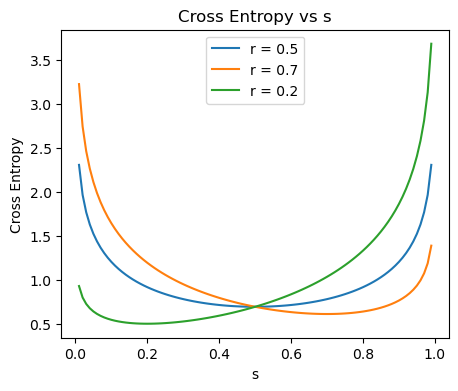

In [678]:
plt.figure(figsize=(5,4))
plt.plot(np.arange(0.01,1,0.01),CE_pq_1,label='r = 0.5')
plt.plot(np.arange(0.01,1,0.01),CE_pq_2,label='r = 0.7')
plt.plot(np.arange(0.01,1,0.01),CE_pq_3,label='r = 0.2')
plt.xlabel('s')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy vs s')
plt.legend()
plt.show()

As can be seen from above, the cross entropy is minimum when  $ s =r $ i.e when $p \sim q$   

### Jenson Shannon Divergence

In [679]:
def JS_div(p,q):
    m = (p+q)/2
    return (CrossEntropy(p,m) + CrossEntropy(q,m))/2

In [680]:
print(f' JS divergence between Left and Right images: {JS_div(left_pmf,right_pmf)} nats')
print(f' JS divergence between Right and Left images: {JS_div(right_pmf,left_pmf)} nats')

 JS divergence between Left and Right images: 5.040658387174725 nats
 JS divergence between Right and Left images: 5.040658387174725 nats


Verifying whether the Joint Distribution is a part of $\Pi(r,s)$

In [681]:
def verify_marginal(p_xy,r_x,s_y):

    p_x = np.sum(p_xy,axis=1)
    p_y = np.sum(p_xy,axis=0)
    
    if np.allclose(p_x,r_x) and np.allclose(p_y,s_y):
        return True

    return False

In [682]:
p_xy = np.array(([0,2/3,1/3],[0,1/3,2/3],[1,0,0]))
p_x = np.array(([1,0,0]))
p_y = np.array(([1/3,2/3,1/3]))
verify_marginal(p_xy,p_x,p_y)

False

### Positive Example

In [683]:
n = 5
pmf = np.array(([0,2/3,1/3],[0,1/3,2/3],[1,0,0]))
pmf_x = np.sum(pmf,axis=1)
pmf_y = np.sum(pmf,axis=0)
print(verify_marginal(pmf,pmf_x,pmf_y))


True


### Negative Example

In [684]:
pmf_x = np.array(([1,0,0]))
pmf_y = np.array(([1/3,1/3,1/3]))

print(verify_marginal(pmf,pmf_x,pmf_y))

False


## Q2. Visualizing Data Using t-SNE:

### 2.a

i. What is the crowding problem? \
The crowding problem refers to the difficulty in mapping high-dimensional data points into a
low-dimensional space (generally 2D or 3D) such that pairwise distances between points in the original space are preserved. 
In high-dimensional datasets, there can be a lot of different pairwise distances,for example in 10D, there can be 11 equidistant points.
Whereas in 2D, there can only be 3 such points.

ii. How does the choice of the Student t-distribution in the low dimensional embedding space help address the crowding problem? \
The use of the Student t-distribution (Cauchy distribution) in the low-dimensional embedding space makes it more robust to the crowding problem compared to Gaussian distributions. The t-distribution has heavier tails than the Gaussian distribution. This allows t-SNE to model moderately apart points in the high-dimensional space as farther apart in the low-dimensional space compared to the Gaussian, effectively creating more space between clusters and preventing different clusters from crowding each other.

iii. What other important changes have been made in t-SNE relative to SNE? \
The original SNE has an asymmetry in its cost function, which means the cost for one point being neighbor to another is not the same as the reverse. t-SNE introduces a symmetric version of the SNE cost function to alleviate this issue.

### 2.b

### Generating 20 Data Points

In [685]:
points_x = np.zeros((10,20))
mean_1 = np.ones(10)
mean_2 = np.ones(10) * 10
cov_matrix = np.eye(10)*0.01

points_x[:,:10] = np.random.multivariate_normal(mean_1,cov_matrix,10).T
points_x[:,10:] = np.random.multivariate_normal(mean_2,cov_matrix,10).T

#### TSNE Function. Returns the 2D representation of the data points

In [686]:
def tSNE(points_x, points_y, embedding_dim = 2,T = 50,learning_rate = 0.01,momentum = 0.9):

    n = points_x.shape[1]
    similarity_matrix = np.zeros((20,20),dtype=np.float64)
    ## Using Same Sigma for all the points as both the distributions have the same covariance matrix
    sigma = 5

    ## Precomputing the similarity matrix (will help in finding probability distributions)
    for i in range(20):
        for j in range(20):
            if i == j:
                similarity_matrix[i,j] = 0
            else:
                similarity_matrix[i,j] = np.exp(-(np.linalg.norm(points_x[:,i] - points_x[:,j]))**2/(2*sigma**2))

    
    p_j_i = np.zeros((20,20))
    p_i_j = np.zeros((20,20))
    ## Estimating the probability distributions
    for i in range(20):
        for j in range(20):
            if i == j:
                p_j_i[i,j] = 0
            else:
                p_j_i[i,j] = similarity_matrix[i,j]/np.sum(similarity_matrix[i,:]) 
     

    for j in range(20):
         for i in range(20):
            if i == j:
                p_i_j[i,j] = 0
            else:
                p_i_j[i,j] = similarity_matrix[i,j]/np.sum(similarity_matrix[:,j])
    ## Computing Joint Distribution 
    p_ij = (p_i_j + p_j_i)/(2*n)

    y = points_y
    y_old = y
    sum = 0

    ## Precomputing the sum of the denominator of q_ij 
    # for k in range(20):
    #     for l in range(20):
    #         if k == l:
    #             sum += (1/(1 + np.linalg.norm(y[:,k] - y[:,l])**2))
    q_ij_initial = np.zeros((20,20))
    q_ij = np.zeros((20,20))
    for t in range(T):
        for i in range(20):
            for j in range(20):
                if i == j:
                    q_ij[i,j] = 0
                else:
                    ## T-Student Distribution
                    q_ij[i,j] = (1/(1 + np.linalg.norm(y[:,i] - y[:,j])**2))
                    
        q_ij = q_ij/np.sum(q_ij)
        if t == 0:
            q_ij_initial = np.copy(q_ij)

        gradient = np.zeros((embedding_dim,n))

        ## Computing Gradient
        for i in range(n):
            for j in range(n):
                gradient[:,i] += 4*((p_ij[i,j] - q_ij[i,j])*(y[:,i] - y[:,j]))/(1 + np.linalg.norm(y[:,i] - y[:,j])**2)

        ## Updating the embedding vectors
        y = y - learning_rate * gradient + momentum * (y - y_old)
        y_old = y
 
    return y,p_ij,q_ij,q_ij_initial

In [687]:
def plot_y(y,title = 'Final Embedding'):

    plt.scatter(y[0,:10],y[1,:10],color = 'red',s = 5)
    plt.scatter(y[0,10:],y[1,10:],color ='blue',s = 5)
    plt.title(title)

### Initialising the embedded vectors using a Gaussian Distribution (As mentioned in the paper)

In [688]:
points_y = np.random.multivariate_normal(np.zeros(2),np.eye(2)*1e-4,20).T
y,P,Q,Q_init = tSNE(points_x,points_y,T = 50,learning_rate=10,momentum=0.6)

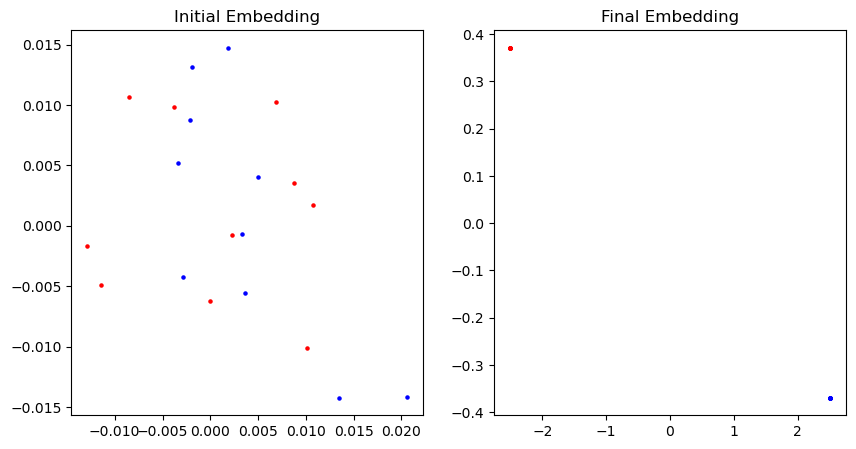

In [689]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_y(points_y,'Initial Embedding')
plt.subplot(1,2,2)
plot_y(y,'Final Embedding')
plt.show()

### We can clearly see that the points are separated into two clusters

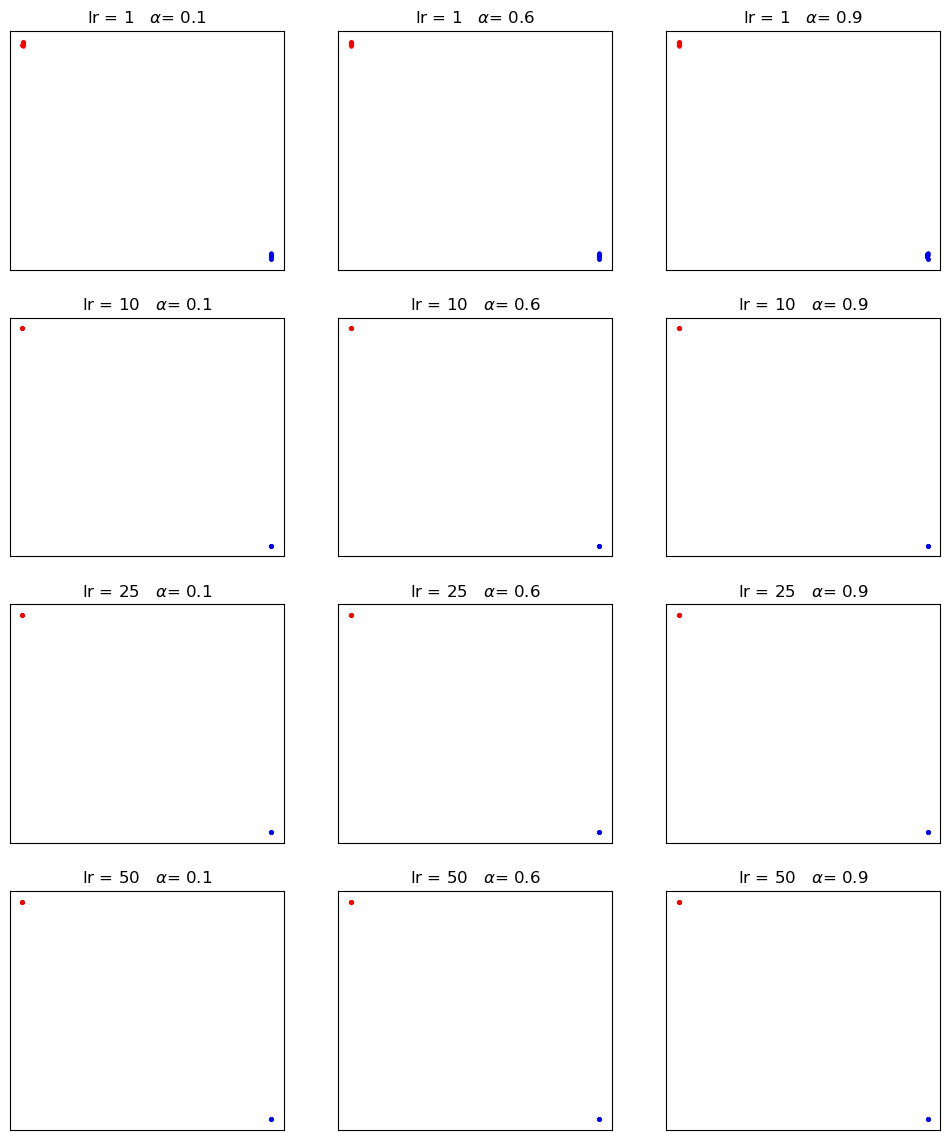

In [690]:
### Experimenting with different values of learning rate and momentum
learning_rates = [1,10,25,50]
momentums = [0.1,0.6,0.9]
i = 1
y_2D = []
for learning_rate in learning_rates:
    for momentum in momentums:
        y_,_,_,_ = tSNE(points_x,points_y,T = 50,learning_rate=learning_rate,momentum=momentum)
        y_2D.append(y_)
i = 1
plt.figure(figsize=(12,18))
for y in y_2D:
    plt.subplot(5,3,i)
    plot_y(y,title=f'lr = {learning_rates[(i-1)//3]}   '+r'$\alpha$' +f'= {momentums[(i-1)%3]}')
    plt.xticks([])
    plt.yticks([])
    i+=1

From the above graphs, we can observe that the algorithm works for a diverse value of learning rates and momentums

In [691]:
def KL_DIV_Joint(p,q):
    KL_Div = 0
    p = p.flatten()
    q = q.flatten()
    for i in range(len(p)):
        if p[i] and q[i]:
            KL_Div += p[i] * np.log(p[i]/q[i])
    
    return KL_Div

Since the distance between the means of the two clusters is 9. $\textbf{1}$ 
$\sigma = 5$ is a decent value to choose. Although on experimentation, the Algorithm does work for a wide range of values

In [692]:
print(f'KL Divergence between P and Q initially : {KL_DIV_Joint(P,Q_init)}')
print(f'KL Divergence between P and Q finally : {KL_DIV_Joint(P,Q)}')

KL Divergence between P and Q initially : 0.7472220322617783
KL Divergence between P and Q finally : 0.04119345114019953


### Using sklearn's inbuilt tSNE function

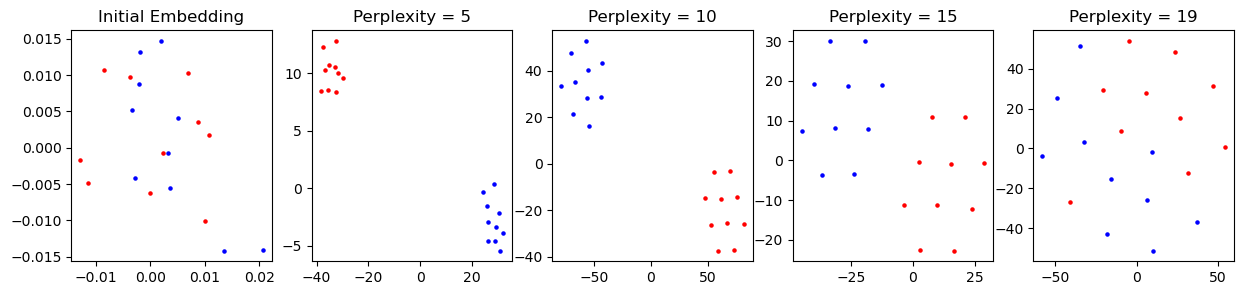

In [693]:
from sklearn.manifold import TSNE
## Expermineting with different values of perplexity
perplexities = [5,10,15,19]
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
plot_y(points_y,'Initial Embedding')
i =2
for p in perplexities:
    tsne = TSNE(n_components=2,perplexity=p)
    plt.subplot(1,5,i)
    plot_y(tsne.fit_transform(points_x.T).T,f'Perplexity = {p}')
    i+=1

As the perplexity increases, the points are more spread out and the clusters get merged.